<a href="https://colab.research.google.com/github/yeonee21/WearableHealthCare/blob/main/SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%cd /content/drive/MyDrive/eei_ML/SW/SpO2HR/

/content/drive/MyDrive/eei_ML/SW/SpO2HR


In [32]:
import math
import numpy as np

from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import get_data


In [33]:
n_future = get_data.n_future
n_past = get_data.n_past

dataset = np.array(get_data.dataset)  # unscaled
x_train = get_data.x_train
y_train = get_data.y_train
x_test = get_data.x_test
y_test = get_data.y_test

scaler = get_data.scaler


In [34]:
# load model
model = load_model('HR_SPO2_PredictionModel.h5')

# Train Prediction
trainPredict = model.predict(x_train)
trainPredict = np.reshape(trainPredict, (-1, trainPredict.shape[2]))

# Test Prediction
testPredict = model.predict(x_test)
testPredict = np.reshape(testPredict, (-1, testPredict.shape[2]))

# Unscale values
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

y_train = scaler.inverse_transform(y_train.reshape(-1, y_train.shape[2]))
y_test = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[2]))

# Evaluate train/test scores
HRtrainScore = math.sqrt(mean_squared_error(y_train[:, 0], trainPredict[:, 0]))
print('HR Train Score: %.2f RMSE' % (HRtrainScore))
HRtestScore = math.sqrt(mean_squared_error(y_test[:, 0], testPredict[:, 0]))
print('HR Test Score: %.2f RMSE' % (HRtestScore))

SPO2trainScore = math.sqrt(mean_squared_error(y_train[:, 1], trainPredict[:, 1]))
print('SPO2 Train Score: %.2f RMSE' % (SPO2trainScore))
SPO2testScore = math.sqrt(mean_squared_error(y_test[:, 1], testPredict[:, 1]))
print('SPO2 Test Score: %.2f RMSE' % (SPO2testScore))


HR Train Score: 9.95 RMSE
HR Test Score: 12.58 RMSE
SPO2 Train Score: 1.88 RMSE
SPO2 Test Score: 1.31 RMSE


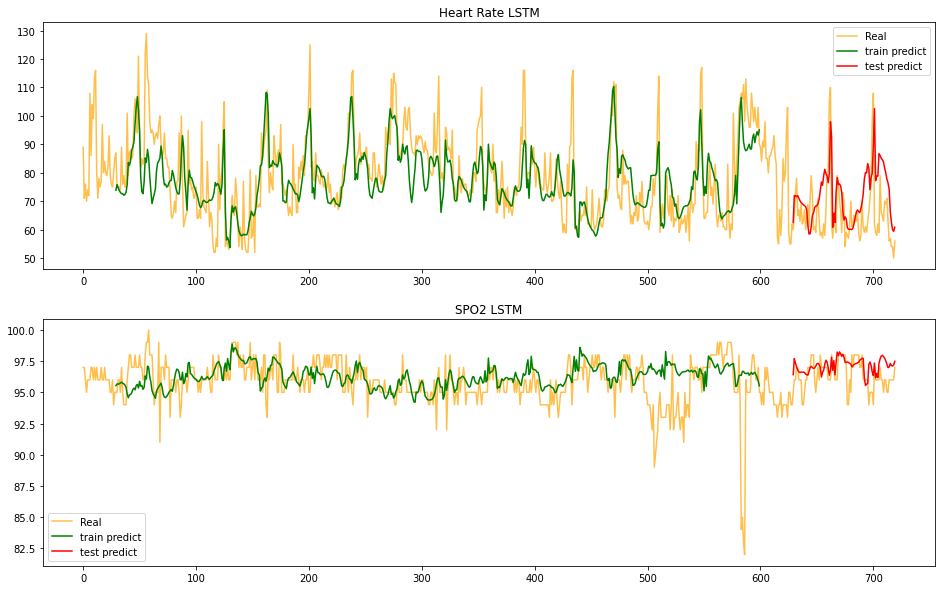

In [35]:
# Plot Predictions
a_axis = np.arange(n_past, len(y_train)+n_past)
b_axis = np.arange(len(y_train)+2*n_past, len(y_train)+len(y_test)+2*n_past)

plt.figure(figsize=(16,10))
plt.subplot(211)
plt.plot(dataset[:, 0], color='orange', alpha=0.7, label='Real')
plt.plot(a_axis, trainPredict[:, 0], color='green', label='train predict')
plt.plot(b_axis, testPredict[:, 0], color='red', label='test predict')
plt.title('Heart Rate LSTM')
plt.legend()

plt.subplot(212)
plt.plot(dataset[:, 1], color='orange', alpha=0.7, label='Real')
plt.plot(a_axis, trainPredict[:, 1], color='green', label='train predict')
plt.plot(b_axis, testPredict[:, 1], color='red', label='test predict')
plt.title('SPO2 LSTM')
plt.legend()



In [38]:
import numpy as np
from prediction import trainPredict, testPredict

#Prediction = np.concatenate((trainPredict, testPredict), axis=0)
Prediction = testPredict

AverageHR = np.mean(Prediction[:, 0])
AverageSPO2 = np.mean(Prediction[:, 1])

HRCondition = ['정상', '낮음', '높음']
SPO2Condition = ['정상', '낮음', '매우 낮음']

HPSPO2score = 0

if 70 <= AverageHR <= 80:
    print('Heart Rate: ', HRCondition[0])
    HPSPO2score += 0
elif AverageHR < 70:
    print('Heart Rate: ', HRCondition[1])
    HPSPO2score += 2
elif 80 <= AverageHR < 90:
    print('Heart Rate: ', HRCondition[2])
    HPSPO2score += 5
elif 90 <= AverageHR < 100:
    print('Heart Rate: ', HRCondition[2])
    HPSPO2score += 7
elif AverageHR >= 100:
    print('Heart Rate: ', HRCondition[2])
    HPSPO2score += 10

if AverageSPO2 >= 80:
    print('SPO2: ', SPO2Condition[0])
    HPSPO2score += 0
elif 60 <= AverageSPO2 < 80:
    print('SPO2: ', SPO2Condition[1])
    HPSPO2score += 5
elif 40 <= AverageSPO2 < 60:
    print('SPO2: ', SPO2Condition[1])
    HPSPO2score += 7
elif AverageSPO2 < 40:
    print('SPO2: ', SPO2Condition[2])
    HPSPO2score += 10

print('Heart Rate & SPO2 SCORE: ', HPSPO2score)





Heart Rate:  정상
SPO2:  정상
Heart Rate & SPO2 SCORE:  0


In [39]:
print('Average Heart Rate: ', AverageHR)
print('Averrage SPO2: ', AverageSPO2)

Average Heart Rate:  72.42328
Averrage SPO2:  96.72609
